# Distance to K-th Nearest Neighbor (DKNN)
 A point is an outlier if its k-th nearest neighbor is very far away. This measures how isolated a point is in its local neighborhood.

``` Normal data points exist in dense regions where many neighbors are close by. Outliers exist in sparse regions where even the k-th closest neighbor is distant.```

Mathematical Definition:
```bash
Let dₖ(x) be the distance from point x to its k-th nearest neighbor
Outlier Score(x) = dₖ(x)
Why K-th Distance Instead of Average?
Method	Pros	Cons
K-th Distance	More robust to local density variations	May miss some contextual information
Average Distance	Smoother, considers all k neighbors	Can be diluted by close neighbors
```
---
### Step-by-Step Example
```bash
Let's use a simple 1D example for clarity:

Dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
Using k=3

Step 1: For each point, find 3rd nearest neighbor distance

Point 1: Neighbors = 2, 3, 4 → 3rd distance = |1-4| = 3
Point 2: Neighbors = 1, 3, 4 → 3rd distance = |2-4| = 2
Point 3: Neighbors = 2, 4, 1 → 3rd distance = |3-4| = 1
Point 4: Neighbors = 3, 5, 2 → 3rd distance = |4-5| = 1
Point 5: Neighbors = 4, 6, 3 → 3rd distance = |5-6| = 1
Point 100: Neighbors = 10, 9, 8 → 3rd distance = |100-8| = 92

Step 2: Outlier Scores


Point    Score
1        3
2        2  
3        1
4        1
5        1
...
100      92  ← Clear outlier!
Detailed 2D Example
Let's examine a more realistic 2D case:

Dataset:


Cluster 1: A(1,1), B(1,2), C(2,1), D(2,2)
Cluster 2: E(8,8), F(8,9), G(9,8), H(9,9)  
Outlier:  O(20,20)
Using k=3, Euclidean distance:

Calculate for point O(20,20):


Distances:
O-A: √((20-1)² + (20-1)²) = √(361 + 361) = √722 ≈ 26.87
O-B: √((20-1)² + (20-2)²) = √(361 + 324) = √685 ≈ 26.17  
O-C: √((20-2)² + (20-1)²) = √(324 + 361) = √685 ≈ 26.17
O-D: √((20-2)² + (20-2)²) = √(324 + 324) = √648 ≈ 25.46
O-E: √((20-8)² + (20-8)²) = √(144 + 144) = √288 ≈ 16.97
O-F: √((20-8)² + (20-9)²) = √(144 + 121) = √265 ≈ 16.28
O-G: √((20-9)² + (20-8)²) = √(121 + 144) = √265 ≈ 16.28
O-H: √((20-9)² + (20-9)²) = √(121 + 121) = √242 ≈ 15.56

Sorted distances: 15.56, 16.28, 16.28, 16.97, 25.46, 26.17, 26.17, 26.87
3rd nearest neighbor distance = 16.28
Compare with point A(1,1) in dense cluster:


A-B: 1.00, A-C: 1.00, A-D: 1.41, A-E: 9.90, ...
3rd nearest neighbor distance = 1.41
Mathematical Properties
Formal Definition:
For a dataset D = {x₁, x₂, ..., xₙ} and integer k (1 ≤ k ≤ n-1):

Let Nₖ(x) be the set of k nearest neighbors of x

Let d(x, y) be the distance between x and y

The k-th distance is: dₖ(x) = max{d(x, y) | y ∈ Nₖ(x)}

Statistical Interpretation:

Small dₖ(x) → point in dense region

Large dₖ(x) → point in sparse region (potential outlier)
```

#### When to Use DKNN
Excellent for:

Local outlier detection in clustered data

Multivariate datasets with complex structures

Situations where global methods fail

No distribution assumptions needed

#### Advantages:

 Simple and intuitive

 No parametric assumptions

 Works with any distance metric

 Good for local outliers

 Theoretically well-founded

#### Limitations:

 Choice of k is critical

 Computationally expensive - O(n²) naive implementation

 Curse of dimensionality

 Sensitive to distance metric choice

Choosing the Right k Value
Small k (2-5):

Detects very local outliers

Sensitive to small density variations

Good for: Fine-grained anomaly detection

Medium k (5-20):

Balanced approach

### Good for: Most practical applications

Large k (20+):

More global perspective

Detects only major outliers

Good for: Very noisy data

Distance Metrics for DKNN
- Euclidean (L2):


``` distance = sqrt(Σ(x_i - y_i)²)```
Most common, isotropic neighborhoods

- Manhattan (L1):


``` distance = Σ|x_i - y_i| ```
More robust to outliers in individual dimensions

- Mahalanobis:


``` distance = √((x-y)ᵀ Σ⁻¹ (x-y)) ```
Accounts for correlation between features

=== Example 1: Simple 2D Dataset ===
k=3: Detected 12 outliers (threshold: 0.786)
k=5: Detected 12 outliers (threshold: 0.929)
k=10: Detected 12 outliers (threshold: 1.163)
k=20: Detected 12 outliers (threshold: 1.473)

Top 10 outlier candidates (k=5):
     point_index          x          y true_type   score_k5
233          233  12.000000  -8.000000   outlier  12.217654
232          232   5.000000 -12.000000   outlier  11.124892
230          230  15.000000  15.000000   outlier   9.466843
231          231 -10.000000   5.000000   outlier   9.314965
104          104   0.515048   3.852731      main   1.984143
131          131  -3.241267  -1.024388      main   1.788859
37            37  -2.619745   0.821903      main   1.307844
210          210   9.030374   8.877670     small   1.134599
89            89  -0.264657   2.720169      main   1.039264
110          110   2.314659  -1.867265      main   1.023771

=== Example 2: Network Traffic Analysis ===
Network traffic analysis:
Total connection

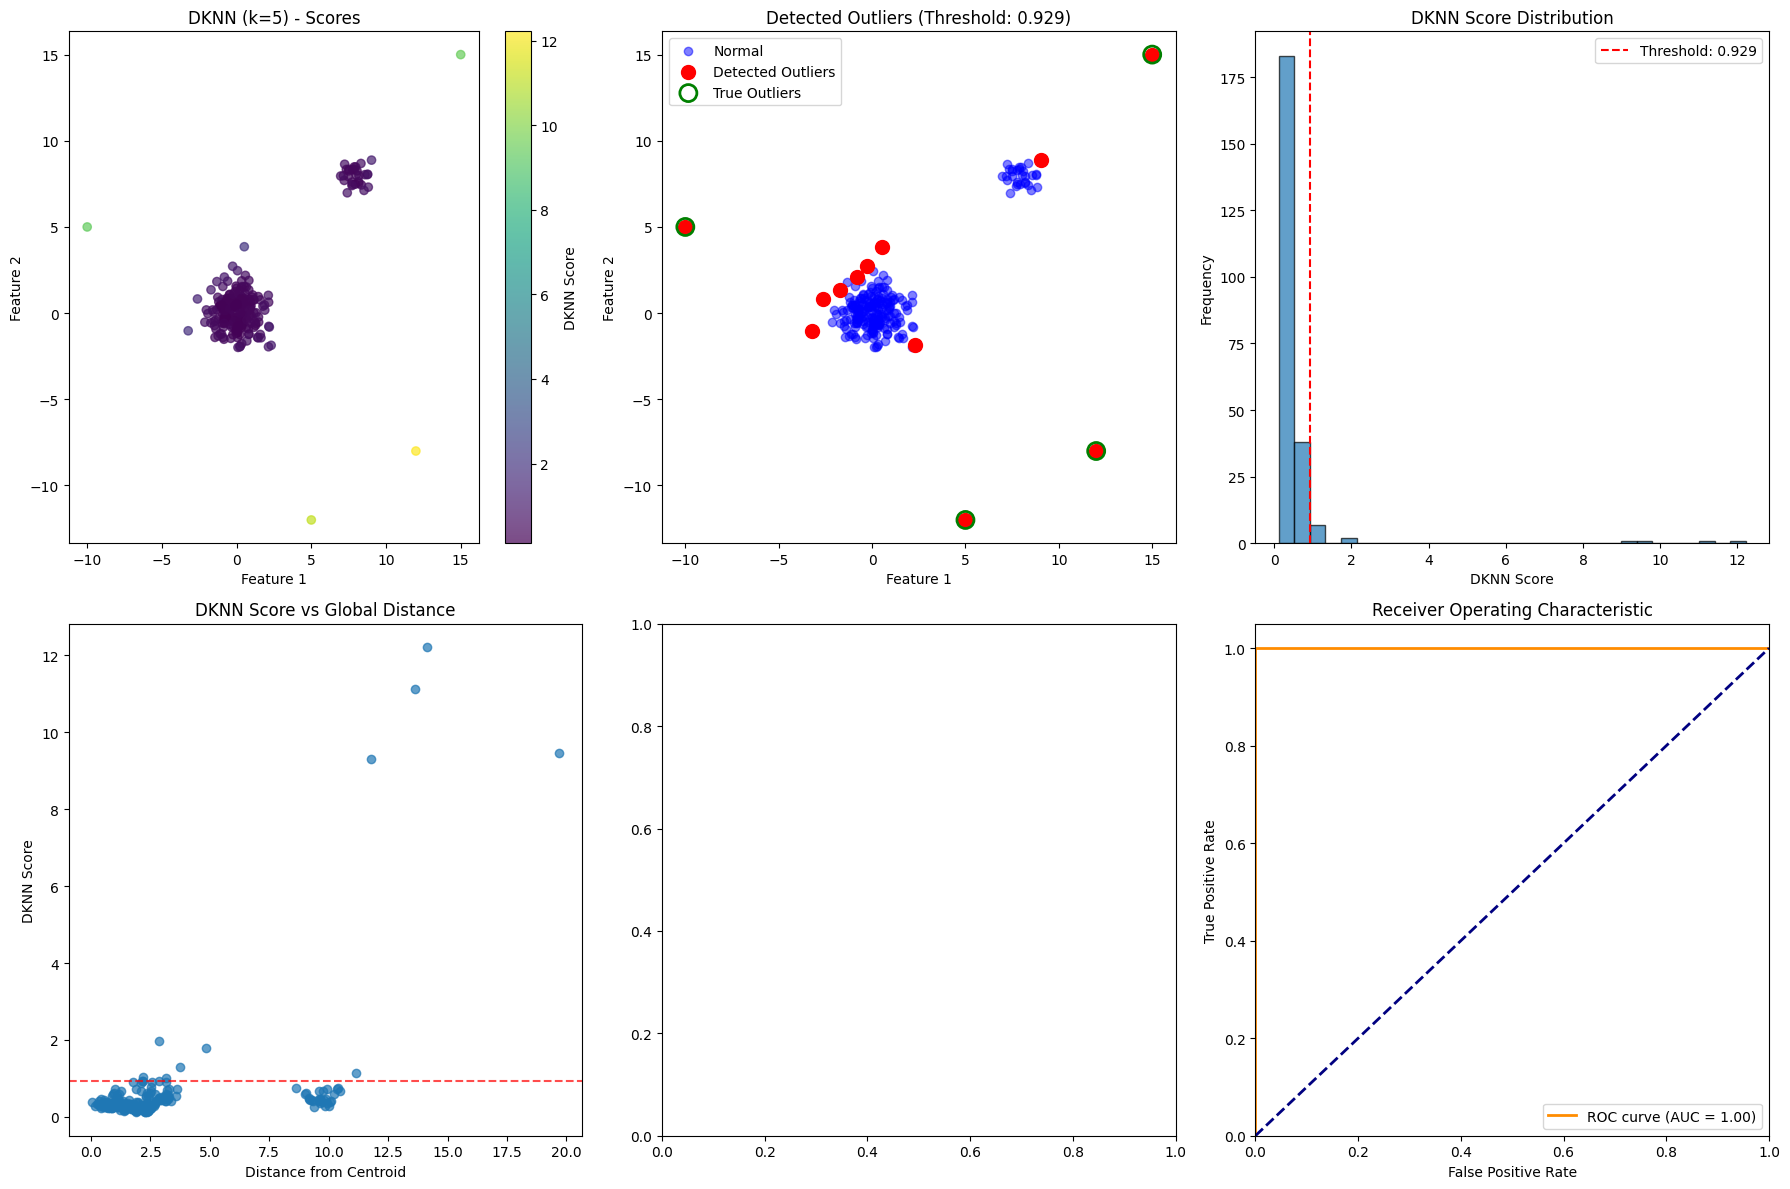


=== Method Comparison ===
Top outliers by different methods:

DKNN:
             x          y  DKNN_score  true_outlier
233  12.000000  -8.000000   12.910887          True
232   5.000000 -12.000000   11.246210          True
230  15.000000  15.000000    9.776377          True
231 -10.000000   5.000000    9.675851          True
104   0.515048   3.852731    2.333475         False

IsolationForest:
            x         y  IsolationForest_score  true_outlier
37  -2.619745  0.821903                      1         False
104  0.515048  3.852731                      1         False
131 -3.241267 -1.024388                      1         False
210  9.030374  8.877670                      1         False
214  8.529212  7.120630                      1         False

LOF:
            x         y  LOF_score  true_outlier
37  -2.619745  0.821903          1         False
89  -0.264657  2.720169          1         False
104  0.515048  3.852731          1         False
110  2.314659 -1.867265          

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def dknn_outlier_detection(X, k=5, metric='euclidean', return_neighbors=False):
    """
    Distance to K-th Nearest Neighbor outlier detection
    """
    # Fit k+1 neighbors (includes the point itself)
    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric)
    nbrs.fit(X)
    
    # Get distances and indices
    # distances[:, 0] is the point itself (distance 0)
    # distances[:, 1] is the 1st nearest neighbor
    # distances[:, k] is the k-th nearest neighbor
    distances, indices = nbrs.kneighbors(X)
    
    # Extract k-th neighbor distances (excluding self)
    dknn_scores = distances[:, k]
    
    if return_neighbors:
        return dknn_scores, distances, indices
    else:
        return dknn_scores

def dknn_with_threshold(X, k=5, threshold_quantile=0.95):
    """
    DKNN with automatic thresholding
    """
    scores = dknn_outlier_detection(X, k=k)
    threshold = np.quantile(scores, threshold_quantile)
    outlier_mask = scores > threshold
    
    return scores, threshold, outlier_mask

# Example 1: Simple 2D dataset with clear outliers
print("=== Example 1: Simple 2D Dataset ===")
np.random.seed(42)

# Generate main cluster
main_cluster = np.random.normal(0, 1, (200, 2))

# Generate smaller cluster
small_cluster = np.random.normal(8, 0.5, (30, 2))

# Add isolated outliers
outliers = np.array([
    [15, 15],    # Far from everything
    [-10, 5],    # Far in negative x
    [5, -12],    # Far in negative y
    [12, -8]     # Far in diagonal
])

# Combine all data
X = np.vstack([main_cluster, small_cluster, outliers])

# Calculate DKNN scores for different k values
k_values = [3, 5, 10, 20]
results = {}

for k in k_values:
    scores = dknn_outlier_detection(X, k=k)
    threshold = np.quantile(scores, 0.95)  # Top 5% as outliers
    outlier_mask = scores > threshold
    
    results[k] = {
        'scores': scores,
        'threshold': threshold,
        'outlier_mask': outlier_mask,
        'n_outliers': np.sum(outlier_mask)
    }
    
    print(f"k={k}: Detected {np.sum(outlier_mask)} outliers (threshold: {threshold:.3f})")

# Compare results for different k
comparison_df = pd.DataFrame({
    'point_index': range(len(X)),
    'x': X[:, 0],
    'y': X[:, 1],
    'true_type': ['main']*200 + ['small']*30 + ['outlier']*4
})

for k in k_values:
    comparison_df[f'outlier_k{k}'] = results[k]['outlier_mask']
    comparison_df[f'score_k{k}'] = results[k]['scores']

print("\nTop 10 outlier candidates (k=5):")
top_outliers = comparison_df.nlargest(10, 'score_k5')
print(top_outliers[['point_index', 'x', 'y', 'true_type', 'score_k5']])

# Example 2: Real-world scenario - network intrusion detection
print("\n=== Example 2: Network Traffic Analysis ===")

def simulate_network_traffic(n_normal=300, n_anomalous=10):
    """
    Simulate network traffic features for outlier detection
    Features: [packet_size, duration, frequency, protocol_type]
    """
    np.random.seed(123)
    
    # Normal traffic (small packets, short duration, high frequency)
    normal_traffic = np.column_stack([
        np.random.exponential(100, n_normal),      # Packet size
        np.random.exponential(2, n_normal),        # Duration  
        np.random.poisson(50, n_normal),           # Frequency
        np.random.choice([0, 1], n_normal)         # Protocol type
    ])
    
    # Anomalous traffic patterns
    anomalous_traffic = np.column_stack([
        np.random.exponential(2000, n_anomalous),  # Very large packets
        np.random.exponential(10, n_anomalous),    # Long duration
        np.random.poisson(5, n_anomalous),         # Low frequency
        np.random.choice([0, 1], n_anomalous)      # Protocol type
    ])
    
    return np.vstack([normal_traffic, anomalous_traffic])

# Generate network data
network_data = simulate_network_traffic()

# Standardize features (important for distance-based methods)
scaler = StandardScaler()
network_scaled = scaler.fit_transform(network_data)

# Detect outliers using DKNN
network_scores = dknn_outlier_detection(network_scaled, k=10)
network_threshold = np.quantile(network_scores, 0.90)  # Top 10% as anomalies
network_outliers = network_scores > network_threshold

print(f"Network traffic analysis:")
print(f"Total connections: {len(network_data)}")
print(f"Detected anomalies: {np.sum(network_outliers)}")
print(f"Threshold score: {network_threshold:.3f}")

# Analyze detected anomalies
anomaly_indices = np.where(network_outliers)[0]
print(f"\nFirst 5 detected anomalies (indices): {anomaly_indices[:5]}")

# Example 3: Sensitivity analysis for k parameter
print("\n=== Example 3: K Parameter Sensitivity ===")

def analyze_k_sensitivity(X, k_range=range(2, 31, 2)):
    """
    Analyze how choice of k affects DKNN results
    """
    sensitivity_results = []
    
    for k in k_range:
        scores = dknn_outlier_detection(X, k=k)
        
        # Count outliers at different thresholds
        for threshold_pct in [90, 95, 99]:
            threshold = np.percentile(scores, threshold_pct)
            n_outliers = np.sum(scores > threshold)
            
            sensitivity_results.append({
                'k': k,
                'threshold_pct': threshold_pct,
                'n_outliers': n_outliers,
                'max_score': np.max(scores),
                'mean_score': np.mean(scores)
            })
    
    return pd.DataFrame(sensitivity_results)

# Perform sensitivity analysis
sensitivity_df = analyze_k_sensitivity(X)

# Pivot for better visualization
pivot_df = sensitivity_df.pivot_table(
    index='k', 
    columns='threshold_pct', 
    values='n_outliers'
)

print("Sensitivity analysis - number of outliers detected:")
print(pivot_df)

# Visualization functions
def plot_dknn_results(X, scores, threshold, true_outliers=None, title="DKNN Outlier Detection"):
    """
    Comprehensive visualization of DKNN results
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot 1: Data points colored by DKNN score
    scatter1 = axes[0, 0].scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter1, ax=axes[0, 0], label='DKNN Score')
    axes[0, 0].set_title(f'{title} - Scores')
    axes[0, 0].set_xlabel('Feature 1')
    axes[0, 0].set_ylabel('Feature 2')
    
    # Plot 2: Detected outliers
    outlier_mask = scores > threshold
    axes[0, 1].scatter(X[~outlier_mask, 0], X[~outlier_mask, 1], 
                      c='blue', alpha=0.5, label='Normal')
    axes[0, 1].scatter(X[outlier_mask, 0], X[outlier_mask, 1], 
                      c='red', s=100, label='Detected Outliers')
    if true_outliers is not None:
        axes[0, 1].scatter(X[true_outliers, 0], X[true_outliers, 1],
                          facecolors='none', edgecolors='green', s=150,
                          linewidth=2, label='True Outliers')
    axes[0, 1].set_title(f'Detected Outliers (Threshold: {threshold:.3f})')
    axes[0, 1].set_xlabel('Feature 1')
    axes[0, 1].set_ylabel('Feature 2')
    axes[0, 1].legend()
    
    # Plot 3: Score distribution
    axes[0, 2].hist(scores, bins=30, alpha=0.7, edgecolor='black')
    axes[0, 2].axvline(threshold, color='red', linestyle='--', 
                      label=f'Threshold: {threshold:.3f}')
    axes[0, 2].set_title('DKNN Score Distribution')
    axes[0, 2].set_xlabel('DKNN Score')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].legend()
    
    # Plot 4: Score vs Distance from centroid
    centroid = np.mean(X, axis=0)
    distances_to_centroid = np.linalg.norm(X - centroid, axis=1)
    axes[1, 0].scatter(distances_to_centroid, scores, alpha=0.7)
    axes[1, 0].axhline(threshold, color='red', linestyle='--', alpha=0.7)
    axes[1, 0].set_xlabel('Distance from Centroid')
    axes[1, 0].set_ylabel('DKNN Score')
    axes[1, 0].set_title('DKNN Score vs Global Distance')
    
    # Plot 5: Sensitivity to k (if multiple k values)
    if hasattr(scores, 'shape') and len(scores.shape) > 1:
        k_values = range(1, scores.shape[1] + 1)
        for i in range(min(10, len(X))):
            axes[1, 1].plot(k_values, scores[i, :], alpha=0.7)
        axes[1, 1].set_xlabel('k value')
        axes[1, 1].set_ylabel('DKNN Score')
        axes[1, 1].set_title('DKNN Score vs k (Sample Points)')
    
    # Plot 6: ROC-style plot (if true labels available)
    if true_outliers is not None:
        from sklearn.metrics import roc_curve, auc
        true_labels = np.zeros(len(X))
        true_labels[true_outliers] = 1
        fpr, tpr, _ = roc_curve(true_labels, scores)
        roc_auc = auc(fpr, tpr)
        
        axes[1, 2].plot(fpr, tpr, color='darkorange', lw=2, 
                       label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[1, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1, 2].set_xlim([0.0, 1.0])
        axes[1, 2].set_ylim([0.0, 1.05])
        axes[1, 2].set_xlabel('False Positive Rate')
        axes[1, 2].set_ylabel('True Positive Rate')
        axes[1, 2].set_title('Receiver Operating Characteristic')
        axes[1, 2].legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    
    return outlier_mask

# Visualize the main example
true_outlier_indices = list(range(230, 234))  # Our known outliers
scores_k5 = dknn_outlier_detection(X, k=5)
threshold_k5 = np.quantile(scores_k5, 0.95)

plot_dknn_results(X, scores_k5, threshold_k5, true_outlier_indices, "DKNN (k=5)")

# Advanced: Comparative analysis with other methods
def compare_outlier_methods(X, true_outliers=None):
    """
    Compare DKNN with other outlier detection methods
    """
    from sklearn.ensemble import IsolationForest
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.svm import OneClassSVM
    
    methods = {}
    
    # DKNN
    methods['DKNN'] = dknn_outlier_detection(X, k=10)
    
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    methods['IsolationForest'] = -iso_forest.fit_predict(X)  # Convert to scores
    
    # Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    methods['LOF'] = -lof.fit_predict(X)
    
    # One-Class SVM (requires scaled data)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    oc_svm = OneClassSVM(gamma='auto', nu=0.05)
    methods['OneClassSVM'] = -oc_svm.fit_predict(X_scaled)
    
    # Compare performance
    comparison = pd.DataFrame(index=range(len(X)))
    comparison['x'] = X[:, 0]
    comparison['y'] = X[:, 1]
    
    for method_name, scores in methods.items():
        comparison[f'{method_name}_score'] = scores
        comparison[f'{method_name}_rank'] = scores.argsort().argsort()
    
    if true_outliers is not None:
        comparison['true_outlier'] = False
        comparison.loc[true_outliers, 'true_outlier'] = True
    
    return comparison, methods

print("\n=== Method Comparison ===")
comparison_results, method_scores = compare_outlier_methods(X, true_outlier_indices)

print("Top outliers by different methods:")
for method in ['DKNN', 'IsolationForest', 'LOF']:
    top_method = comparison_results.nlargest(5, f'{method}_score')
    print(f"\n{method}:")
    print(top_method[['x', 'y', f'{method}_score', 'true_outlier']])